## Set Up Dependencies


In [1]:
import datetime
import os

from cliffs_delta import cliffs_delta
import numpy as np
import pandas as pd
import pecking
import matplotlib as mpl
from matplotlib import pyplot as plt
import pecking
import seaborn as sns
from slugify import slugify
from teeplot import teeplot as tp

from pylib._describe_effect import describe_effect
from pylib._styler_to_pdf import styler_to_pdf


## Data Retrieval and Preprocessing


In [2]:
df = pd.read_parquet("https://osf.io/ah7v5/download")


In [3]:
df["Num Reconstructed Inner Nodes"] = df["num_reconstructed_inner_nodes"]
df["Num True Inner Nodes"] = df["num_true_inner_nodes"]
df["Raw Triplet Distance"] = df["triplet_distance_raw"]
df["Sampled Triplet Distance Strict Reconst"] = df[
    "sampled_triplet_distance_strict_reconst"
]
df["Strict Triplet Distance"] = df["sampled_triplet_distance_strict"]
df["Lax Triplet Distance"] = df["sampled_triplet_distance_lax"]
df["Differentia Width (bits)"] = df["differentia_width_bits"]
df["Annotation Size (bits)"] = df["annotation_size_bits"]
df["Algorithm"] = df["algorithm"]
df["Population Size"] = df["population_size"]
df["Num Generations"] = df["num_generations"]
df["Num Islands"] = df["num_islands"]
df["Num Niches"] = df["num_niches"]
df["Tournament Size"] = df["tournament_size"]
df["Replicate"] = df["replicate"]
df["Downsample"] = df["downsample"]


In [4]:
df["Inner Node Resolution"] = (
    df["Num Reconstructed Inner Nodes"] / df["Num True Inner Nodes"]
)
df["Inner Node Loss"] = 1 - df["Inner Node Resolution"]


In [5]:
df["Dynamics"] = (
    "islands"
    + df["Num Islands"].astype(str)
    + "-niches"
    + df["Num Niches"].astype(str)
    + "-tsize"
    + df["Tournament Size"].astype(str)
)


In [6]:
df["Scale"] = (
    "npop"
    + df["Population Size"].astype(str)
    + "-ngen"
    + df["Num Generations"].astype(str)
)


In [7]:
df["Scenario"] = df["Dynamics"].map(
    {
        "islands1-niches1-tsize2": "plain",
        "islands1-niches1-tsize1": "drift",
        "islands4-niches2-tsize2": "mild\nstructure",
        "islands64-niches8-tsize2": "rich\nstructure",
    }
)


In [8]:
df["Policy"] = df["Algorithm"].map(
    {
        "surf-tilted": "Tilted",
        "col-tilted": "Tilted",
        "surf-hybrid": "Hybrid",
        "surf-steady": "Steady",
        "col-steady": "Steady",
    }
)


In [9]:
df["Implementation"] = df["Algorithm"].map(
    {
        "surf-tilted": "Surface",
        "col-tilted": "Column",
        "surf-hybrid": "Surface",
        "surf-steady": "Surface",
        "col-steady": "Column",
    }
)


In [10]:
for col in df.columns:
    df[col.replace(" ", "\n")] = df[col]


In [11]:
sensitivity_analysis_variables = [
    "Differentia\nWidth\n(bits)",
    "Algorithm",
    # "Num\nGenerations",
    "Annotation\nSize\n(bits)",
]


In [12]:
dfx = df.melt(
    id_vars=[
        "Algorithm",
        "Annotation Size (bits)",
        "Annotation\nSize\n(bits)",
        "annotation_size_bits",
        "Differentia Width (bits)",
        "Differentia\nWidth\n(bits)",
        "differentia_width_bits",
        "Downsample",
        "downsample",
        "Dynamics",
        "Implementation",
        "Policy",
        "Scenario",
        "Scale",
        "Population Size",
        "Population\nSize",
        "population_size",
        "Num Generations",
        "Num\nGenerations",
        "num_generations",
        "Num Islands",
        "Num Niches",
        "Tournament Size",
        "Replicate",
    ],
    value_vars=[
        "Strict\nTriplet\nDistance",
        "Lax\nTriplet\nDistance",
        "Inner\nNode\nLoss",
    ],
)
dfx.head()


,Algorithm,Annotation Size (bits),Annotation\nSize\n(bits),annotation_size_bits,Differentia Width (bits),Differentia\nWidth\n(bits),differentia_width_bits,Downsample,downsample,Dynamics,...,population_size,Num Generations,Num\nGenerations,num_generations,Num Islands,Num Niches,Tournament Size,Replicate,variable,value
0,col-steady,256,256,256,8,8,8,500,500,islands4-niches2-tsize2,...,4096,100000,100000,100000,4,2,2,4,Strict\nTriplet\nDistance,1.000000
1,col-steady,256,256,256,8,8,8,500,500,islands4-niches2-tsize2,...,4096,100000,100000,100000,4,2,2,12,Strict\nTriplet\nDistance,1.000000
2,col-steady,256,256,256,8,8,8,500,500,islands4-niches2-tsize2,...,4096,100000,100000,100000,4,2,2,2,Strict\nTriplet\nDistance,1.000000
3,col-steady,256,256,256,8,8,8,500,500,islands4-niches2-tsize2,...,4096,100000,100000,100000,4,2,2,19,Strict\nTriplet\nDistance,0.259036
4,col-steady,256,256,256,8,8,8,500,500,islands4-niches2-tsize2,...,4096,100000,100000,100000,4,2,2,1,Strict\nTriplet\nDistance,1.000000


## Visualize Main Metrics -- Population Size


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


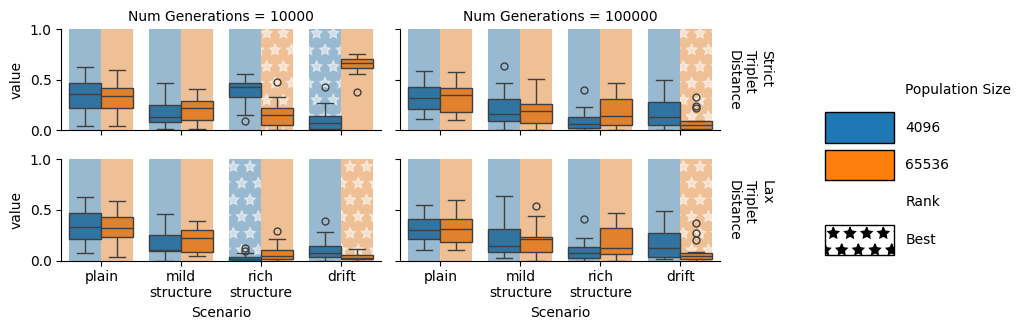

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-hybrid',
 'Annotation\nSize\n(bits)': 32}

/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


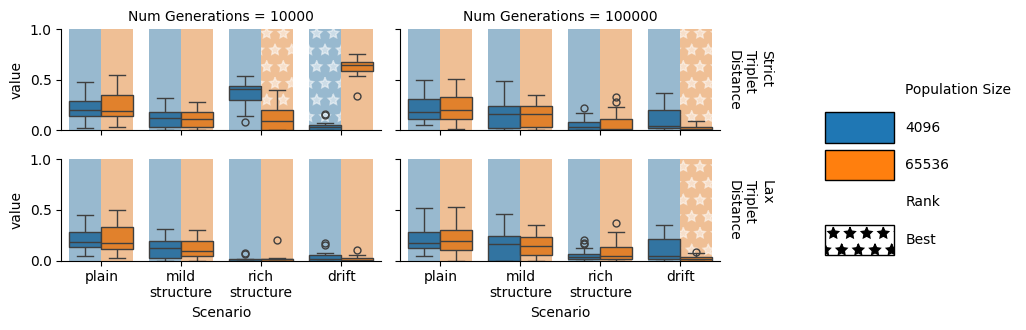

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-hybrid',
 'Annotation\nSize\n(bits)': 64}

/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


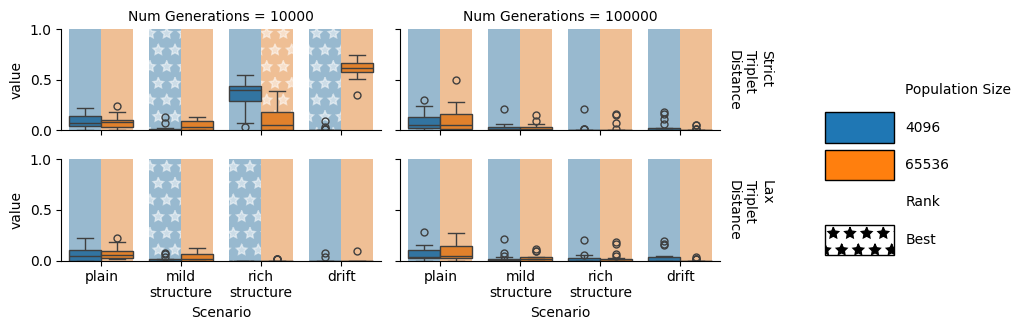

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-hybrid',
 'Annotation\nSize\n(bits)': 256}

teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


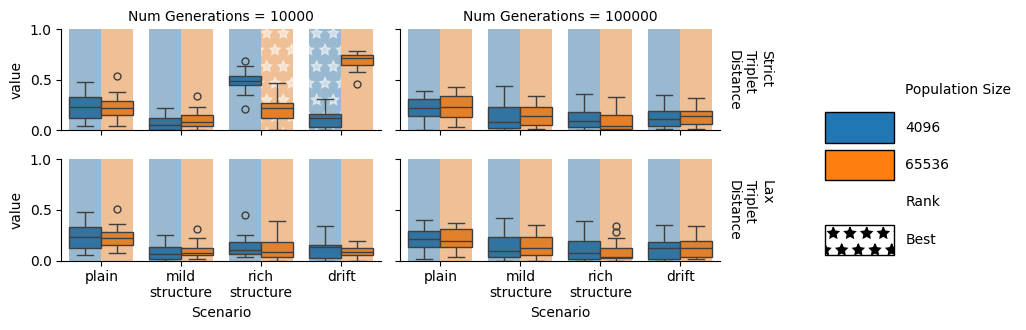

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-tilted',
 'Annotation\nSize\n(bits)': 32}

/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


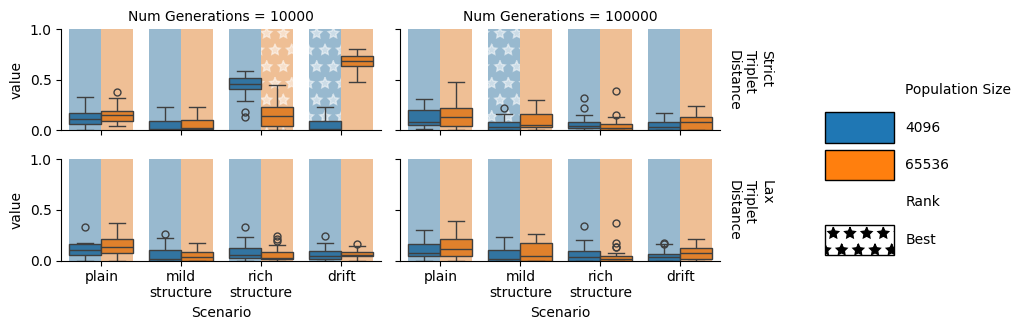

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-tilted',
 'Annotation\nSize\n(bits)': 64}

/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


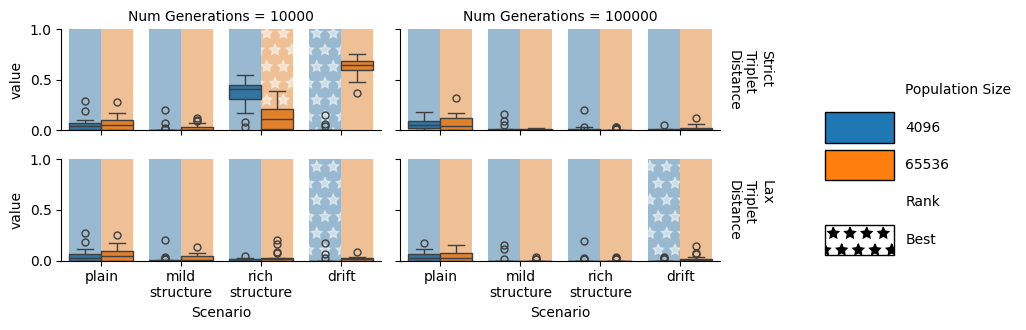

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-tilted',
 'Annotation\nSize\n(bits)': 256}

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_l

/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


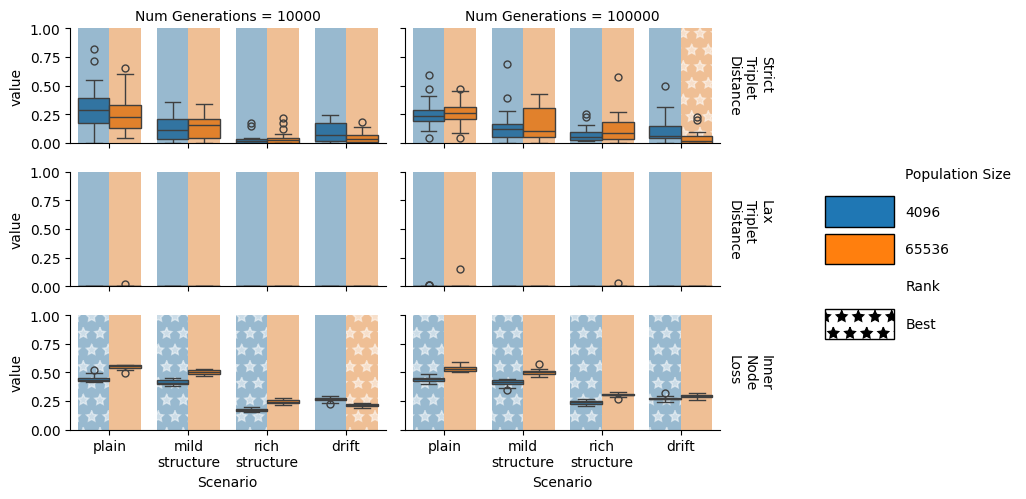

{'Differentia\nWidth\n(bits)': 8,
 'Algorithm': 'surf-hybrid',
 'Annotation\nSize\n(bits)': 256}

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=population-size+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


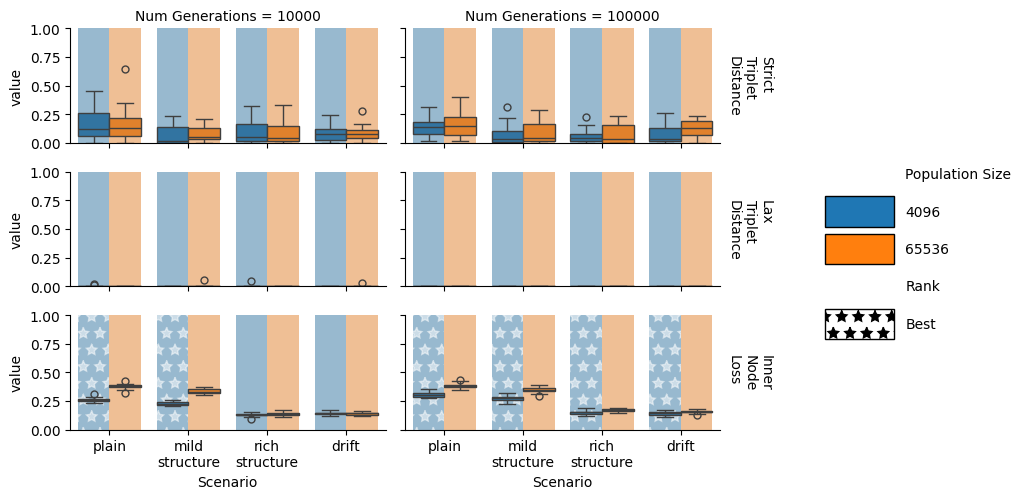

{'Differentia\nWidth\n(bits)': 8,
 'Algorithm': 'surf-tilted',
 'Annotation\nSize\n(bits)': 256}

In [13]:
for name, group in dfx[
    (dfx["downsample"] == 500)
    & (dfx["Algorithm"].isin(["surf-tilted", "surf-hybrid"]))
].groupby(sensitivity_analysis_variables):
    group_variables = dict(zip(sensitivity_analysis_variables, name))

    row_order = [
        "Strict\nTriplet\nDistance",
        "Lax\nTriplet\nDistance",
    ]
    if group_variables["Differentia\nWidth\n(bits)"] > 1:
        row_order.append(
            "Inner\nNode\nLoss",
        )

    tp.tee(
        pecking.peckplot,
        data=group.reset_index(drop=True),
        score="value",
        x="Scenario",
        y="value",
        col="Num Generations",
        row="variable",
        row_order=row_order,
        hue="Population Size",
        x_group="outer",
        order=[
            "plain",
            "mild\nstructure",
            "rich\nstructure",
            "drift",
        ],
        skim_hatches=("*",),
        skim_labels=("Best",),
        skimmers=[pecking.skim_lowest],
        margin_titles=True,
        height=1.7,
        aspect=2.5,
        facet_kws={
            "ylim": (0, 1),
        },
        teeplot_outattrs={
            slugify(k): slugify(v) for k, v in group_variables.items()
        },
        teeplot_outexclude=["post", "teeplot_postprocess"],
        teeplot_postprocess="teed.figure.subplots_adjust(right=0.75); teed.set_titles(row_template='{row_name}')",
    )
    display(group_variables)


## Visualize Main Metrics -- Downsample


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


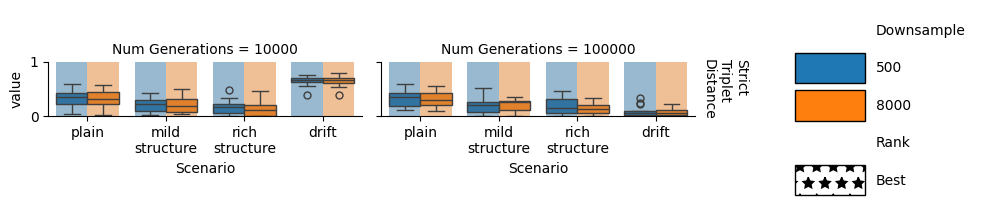

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-hybrid',
 'Annotation\nSize\n(bits)': 32}

/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


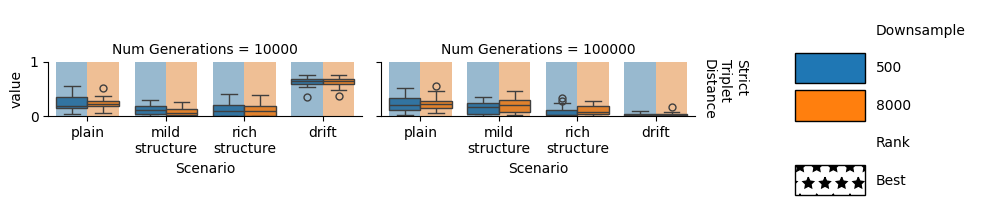

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-hybrid',
 'Annotation\nSize\n(bits)': 64}

/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


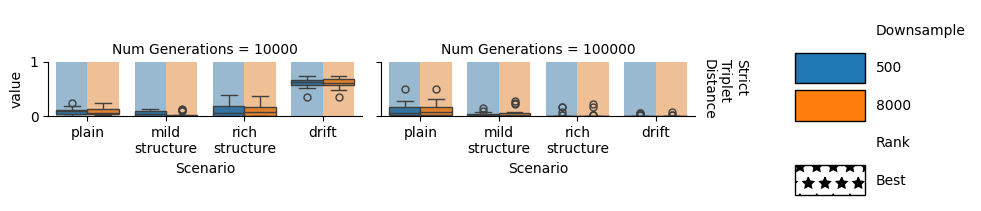

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-hybrid',
 'Annotation\nSize\n(bits)': 256}

teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


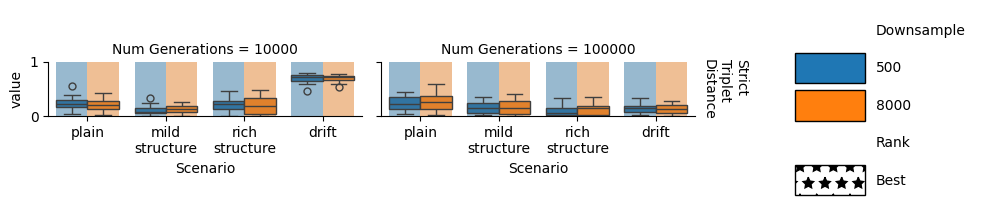

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-tilted',
 'Annotation\nSize\n(bits)': 32}

/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


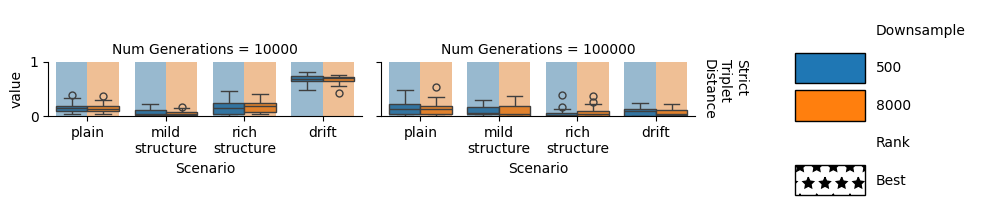

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-tilted',
 'Annotation\nSize\n(bits)': 64}

/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


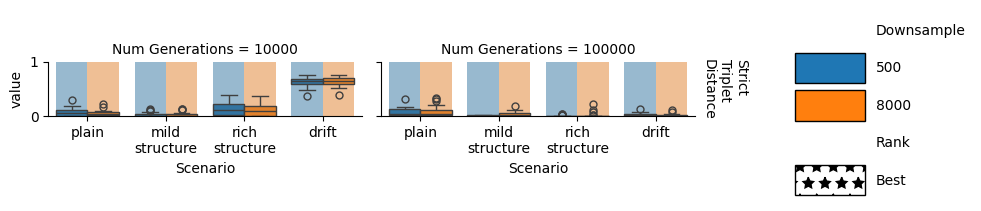

{'Differentia\nWidth\n(bits)': 1,
 'Algorithm': 'surf-tilted',
 'Annotation\nSize\n(bits)': 256}

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-hybrid+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


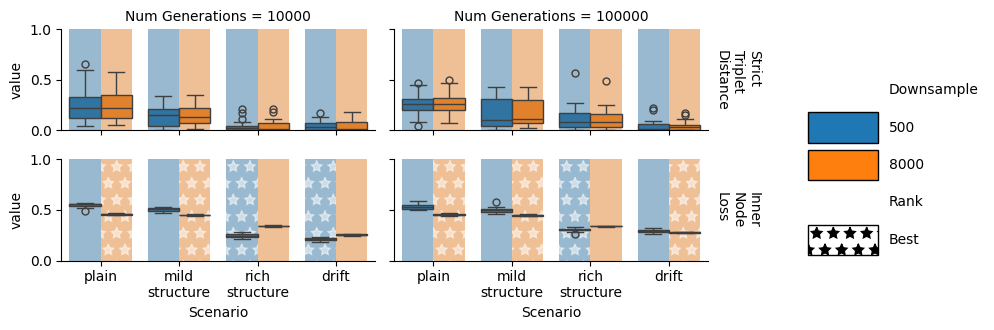

{'Differentia\nWidth\n(bits)': 8,
 'Algorithm': 'surf-hybrid',
 'Annotation\nSize\n(bits)': 256}

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `All numbers are identical in kruskal` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.pdf


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png, overwriting it
  warnings.warn(


teeplots/algorithm=surf-tilted+annotation-size-bits=+col=num-generations+differentia-width-bits=+hue=downsample+row=variable+score=value+viz=peckplot+x=scenario+x-group=outer+y=value+ext=.png


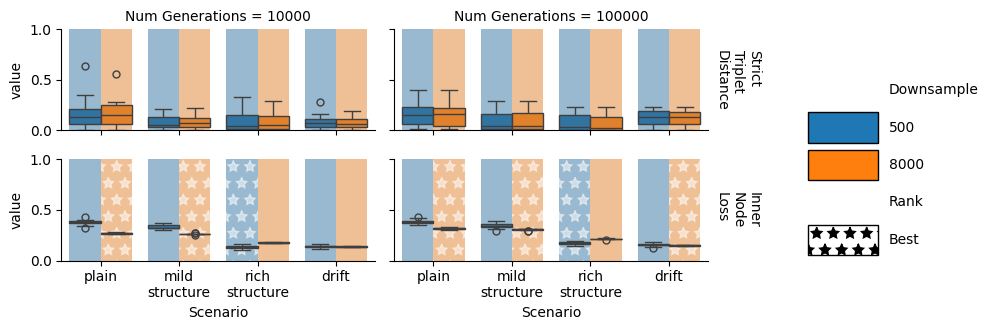

{'Differentia\nWidth\n(bits)': 8,
 'Algorithm': 'surf-tilted',
 'Annotation\nSize\n(bits)': 256}

In [14]:
for name, group in dfx[
    (dfx["Population Size"] == 65536)
    & (dfx["Algorithm"].isin(["surf-tilted", "surf-hybrid"]))
].groupby(sensitivity_analysis_variables):
    group_variables = dict(zip(sensitivity_analysis_variables, name))

    row_order = [
        "Strict\nTriplet\nDistance",
        # "Lax\nTriplet\nDistance",
    ]
    if group_variables["Differentia\nWidth\n(bits)"] > 1:
        row_order.append(
            "Inner\nNode\nLoss",
        )

    tp.tee(
        pecking.peckplot,
        data=group.reset_index(drop=True),
        score="value",
        x="Scenario",
        y="value",
        col="Num Generations",
        row="variable",
        row_order=row_order,
        hue="Downsample",
        x_group="outer",
        order=[
            "plain",
            "mild\nstructure",
            "rich\nstructure",
            "drift",
        ],
        skim_hatches=("*",),
        skim_labels=("Best",),
        skimmers=[pecking.skim_lowest],
        margin_titles=True,
        height=1.7,
        aspect=2.5,
        facet_kws={
            "ylim": (0, 1),
        },
        teeplot_outattrs={
            slugify(k): slugify(v) for k, v in group_variables.items()
        },
        teeplot_outexclude=["post", "teeplot_postprocess"],
        teeplot_postprocess="teed.figure.subplots_adjust(right=0.75); teed.set_titles(row_template='{row_name}')",
    )
    display(group_variables)


## Make Stat Table


In [15]:
lookup_effect = {}


def cached_delta(x, y):
    d = -cliffs_delta(x, y)[0]
    lookup_effect[d] = describe_effect(x, y)
    return d


vars = [
    "Policy",
    "Scenario",
    *sensitivity_analysis_variables,
    "Num Generations",
    "Algorithm",
]

records = []
for name, group in (
    df[
        (df["downsample"] == 500)
    ]
    .reset_index()
    .groupby(vars)
):
    group_variables = dict(zip(vars, name))
    records.append(
        {
            **group_variables,
            **{
                "Strict<br/>Triplet<br/>Distance": cached_delta(
                    group[group["Population Size"] == 4096][
                        "Strict Triplet Distance"
                    ],
                    group[group["Population Size"] == 65536][
                        "Strict Triplet Distance"
                    ],
                ),
                "Lax<br/>Triplet<br/>Distance": cached_delta(
                    group[group["Population Size"] == 4096][
                        "Lax Triplet Distance"
                    ],
                    group[group["Population Size"] == 65536][
                        "Lax Triplet Distance"
                    ],
                ),
                "Inner<br/>Node<br/>Loss": (
                    cached_delta(
                        group[group["Population Size"] == 4096][
                            "Inner Node Loss"
                        ],
                        group[group["Population Size"] == 65536][
                            "Inner Node Loss"
                        ],
                    )
                    # if group_variables["Differentia\nWidth\n(bits)"] > 1
                    # else float("nan")
                ),
            },
            "Scaling Factor": "Population Size",
        }
    )

for name, group in (
    df[
        (df["Population Size"] == 65536)
    ]
    .reset_index()
    .groupby(vars)
):
    group_variables = dict(zip(vars, name))
    records.append(
        {
            **group_variables,
            **{
                "Strict<br/>Triplet<br/>Distance": cached_delta(
                    group[group["Downsample"] == 500][
                        "Strict Triplet Distance"
                    ],
                    group[group["Downsample"] == 8000][
                        "Strict Triplet Distance"
                    ],
                ),
                "Lax<br/>Triplet<br/>Distance": cached_delta(
                    group[group["Downsample"] == 500]["Lax Triplet Distance"],
                    group[group["Downsample"] == 8000]["Lax Triplet Distance"],
                ),
                "Inner<br/>Node<br/>Loss": (
                    cached_delta(
                        group[group["Downsample"] == 500]["Inner Node Loss"],
                        group[group["Downsample"] == 8000]["Inner Node Loss"],
                    )
                    # if group_variables["Differentia\nWidth\n(bits)"] > 1
                    # else float("nan")
                ),
            },
            "Scaling Factor": "Sample Size",
        }
    )

for name, group in (
    df[
        ((df["Population Size"] == 65536) & (df["downsample"] == 8000))
        | ((df["Population Size"] == 4096) & (df["downsample"] == 500))
    ]
    .reset_index()
    .groupby(vars)
):
    group_variables = dict(zip(vars, name))
    records.append(
        {
            **group_variables,
            **{
                "Strict<br/>Triplet<br/>Distance": cached_delta(
                    group[group["Downsample"] == 500][
                        "Strict Triplet Distance"
                    ],
                    group[group["Downsample"] == 8000][
                        "Strict Triplet Distance"
                    ],
                ),
                "Lax<br/>Triplet<br/>Distance": cached_delta(
                    group[group["Downsample"] == 500]["Lax Triplet Distance"],
                    group[group["Downsample"] == 8000]["Lax Triplet Distance"],
                ),
                "Inner<br/>Node<br/>Loss": (
                    cached_delta(
                        group[group["Downsample"] == 500]["Inner Node Loss"],
                        group[group["Downsample"] == 8000]["Inner Node Loss"],
                    )
                    # if group_variables["Differentia\nWidth\n(bits)"] > 1
                    # else float("nan")
                ),
            },
            "Scaling Factor": "Both Population and Sample Size",
        }
    )


dfr = pd.DataFrame.from_records(records)
dfr


,Policy,Scenario,Differentia\nWidth\n(bits),Algorithm,Annotation\nSize\n(bits),Num Generations,Strict<br/>Triplet<br/>Distance,Lax<br/>Triplet<br/>Distance,Inner<br/>Node<br/>Loss,Scaling Factor
0,Hybrid,drift,1,surf-hybrid,32,10000,0.9950,-0.3925,-1.0000,Population Size
1,Hybrid,drift,1,surf-hybrid,32,100000,-0.4275,-0.4875,-1.0000,Population Size
2,Hybrid,drift,1,surf-hybrid,64,10000,1.0000,-0.2325,-1.0000,Population Size
3,Hybrid,drift,1,surf-hybrid,64,100000,-0.4600,-0.4375,-0.1025,Population Size
4,Hybrid,drift,1,surf-hybrid,256,10000,1.0000,-0.0450,-1.0000,Population Size
...,...,...,...,...,...,...,...,...,...,...
475,Tilted,rich\nstructure,1,surf-tilted,256,100000,-0.1250,0.0600,-0.9750,Both Population and Sample Size
476,Tilted,rich\nstructure,8,col-tilted,256,10000,-0.0625,-0.0000,1.0000,Both Population and Sample Size
477,Tilted,rich\nstructure,8,col-tilted,256,100000,0.0425,-0.0000,1.0000,Both Population and Sample Size
478,Tilted,rich\nstructure,8,surf-tilted,256,10000,-0.0150,-0.0500,1.0000,Both Population and Sample Size


In [16]:
cmap = mpl.colormaps.get_cmap("coolwarm")
cmap.set_bad(color="white")


In [17]:
dfr["Unit"] = dfr["Differentia\nWidth\n(bits)"].map({1: "bit", 8: "byte"})
dfr["Size<br/>(bits)"] = dfr["Annotation\nSize\n(bits)"]


## Draw Stat Table --- steady


In [18]:
vars = [
    "Scaling Factor",
    "Scenario",
    "Unit",
    # "Num Generations",
    "Size<br/>(bits)",
]
styled_dfs = (
    dfr[
        (dfr["Num Generations"] == 100000)
        & (dfr["Algorithm"].isin(["col-steady"]))
    ]
    .set_index(vars)
    .unstack(level=0)[
        [
            "Strict<br/>Triplet<br/>Distance",
            # "Lax<br/>Triplet<br/>Distance",
            "Inner<br/>Node<br/>Loss",
        ]
    ]
    .swaplevel(axis="columns")
    .sort_index(axis=1, level=0, ascending=False)
    .style.background_gradient(cmap=cmap, vmin=-1, vmax=1, axis=None)
    .format(lambda x: lookup_effect.get(x, "n/a"))
)

props = [
    ("cellpadding", "0px"),
    ("cellspacing", "0px"),
    ("border", "1px solid black"),
    ("border-collapse", "collapse"),
    ("max-width", "80px !important"),
    ("word-wrap", "break-word"),
]
moreprops = [
    *props,
    ("padding-top", "0px"),
    ("padding-bottom", "0px"),
    ("margin", "0px"),
    ("height", "0px"),
]
smallprops = [
    *moreprops,
    ("font-size", "9px"),
    ("text-align", "center"),
    ("width", "65px"),
]
bigprops = [
    *moreprops,
    ("font-size", "11px"),
    ("color", "white"),
    ("background-color", "DimGray"),
]

divider_style = [
    # Header cell borders
    {"selector": "th", "props": bigprops},
    # Data cell borders
    {"selector": "td", "props": smallprops},
    # Row borders
    {"selector": "tr", "props": smallprops},
]
styled_dfs = styled_dfs.set_table_styles(divider_style).set_table_attributes(
    'style="cellspacing:0;border-collapse:collapse;font-family:sans-serif;"'
)

styled_dfs


In [19]:
os.makedirs("outplots", exist_ok=True)
styler_to_pdf(styled_dfs, "outplots/dsamp-popsize-scale-steady.pdf")


inkscape output:
 
** (inkscape:6413): WARNING **: 04:17:44.917: No pages selected, getting first page only.

** (inkscape:6413): WARNING **: 04:17:45.087: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.



## Draw Summary Steady


In [20]:
dfp = dfr[
    (dfr["Num Generations"] == 100000)
    & (dfr["Algorithm"].isin(["surf-steady"]))
]


In [21]:
dfp = dfp.rename(
    columns={
        "Inner<br/>Node<br/>Loss": "Inner Node Loss Numerical",
        "Strict<br/>Triplet<br/>Distance": "Strict Triplet Distance Numerical",
    },
)
dfp["Inner Node Loss Numerical"] = dfp["Inner Node Loss Numerical"]* -1
dfp["Strict Triplet Distance Numerical"] = dfp["Strict Triplet Distance Numerical"] * -1


In [22]:
dfp["Strict Triplet Distance"] = dfp["Strict Triplet Distance Numerical"].apply(
    lambda x: {
        -1: "downscale better",
        0: "neutral",
        1: "upscale better",
    }[
        ("*" in lookup_effect.get(-x))
        * np.sign(x)
    ],
)
dfp["Inner Node Loss"] = dfp["Inner Node Loss Numerical"].apply(
    lambda x: {
        -1: "downscale better",
        0: "neutral",
        1: "upscale better",
    }[
        ("*" in lookup_effect.get(-x))
        * np.sign(x)
    ],
)


In [23]:
id_vars = [
    "Policy",
    "Scenario",
    "Unit",
    "Scaling Factor",
    # "Num Generations",
    "Size<br/>(bits)",
]
dfm = pd.DataFrame.merge(
    dfp.melt(
        id_vars=id_vars,
        value_vars=[
            "Strict Triplet Distance",
            "Inner Node Loss",
        ],
    ),
    dfp.melt(
        id_vars=id_vars,
        value_vars=[
            "Strict Triplet Distance Numerical",
            "Inner Node Loss Numerical",
        ],
    ),
    on=id_vars,
)


In [24]:
dfm = dfm[
    (
        dfm["variable_x"].isin(["Strict Triplet Distance"])
        & dfm["variable_y"].isin(["Strict Triplet Distance Numerical"])
    )
    | (
        dfm["variable_x"].isin(["Inner Node Loss"])
        & dfm["variable_y"].isin(["Inner Node Loss Numerical"])
    )
].reset_index()


In [25]:
dfm["Scenario"] = dfm["Scenario"].apply(lambda x: x.split("\n")[0])


In [26]:
dfm["Scaling Factor"].replace(
    {"Both Population and Sample Size": "Both"},
    inplace=True,
)
dfm["Scaling Factor"] = dfm["Scaling Factor"].apply(lambda x: x.replace(" ", "\n"))


/home/runner/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/home/runner/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/col=metric+hue=relative-grade+kind=strip+policy=steady+row=scaling-factor+viz=catplot+x=cliff-s-delta+y=scenario+ext=.pdf


teeplots/col=metric+hue=relative-grade+kind=strip+policy=steady+row=scaling-factor+viz=catplot+x=cliff-s-delta+y=scenario+ext=.png


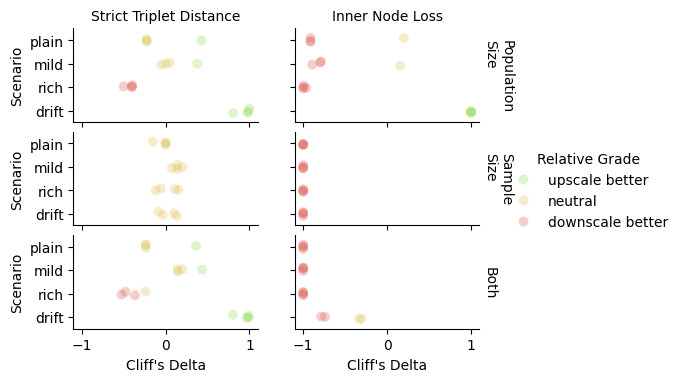

In [27]:
tp.tee(
    sns.catplot,
    dfm.rename(
        {
            "variable_x": "Metric",
            "value_y": "Cliff's Delta",
            "value_x": "Relative Grade",
        },
        axis=1,
    ),
    x="Cliff's Delta",
    # y="Policy",
    row="Scaling Factor",
    # row_order=["Tilted", "Steady"],
    hue="Relative Grade",
    hue_order=[
        "upscale better",
        "neutral",
        "downscale better",
    ],
    order=[
        "plain",
        "mild",
        "rich",
        "drift",
    ],
    col="Metric",
    # row="Scenario",
    y="Scenario",
    margin_titles=True,
    aspect=2,
    height=1.3,
    palette=sns.color_palette("hls", 8)[:3][::-1],
    alpha=0.3,
    s=50,
    kind="strip",
    teeplot_postprocess="teed.set_titles(col_template='{col_name}', row_template='{row_name}'); teed.tight_layout();",
    facet_kws=dict(
        gridspec_kws={"hspace":0.1},
    ),
    teeplot_outattrs={
        "policy": "steady",
    },
)
plt.show()


## Draw Stat Table --- tilted


In [28]:
vars = [
    "Scaling Factor",
    "Scenario",
    "Unit",
    # "Num Generations",
    "Size<br/>(bits)",
]
styled_dfs = (
    dfr[
        (dfr["Num Generations"] == 100000)
        & (dfr["Algorithm"].isin(["surf-tilted"]))
    ]
    .set_index(vars)
    .unstack(level=0)[
        [
            "Strict<br/>Triplet<br/>Distance",
            # "Lax<br/>Triplet<br/>Distance",
            "Inner<br/>Node<br/>Loss",
        ]
    ]
    .swaplevel(axis="columns")
    .sort_index(axis=1, level=0, ascending=False)
    .style.background_gradient(cmap=cmap, vmin=-1, vmax=1, axis=None)
    .format(lambda x: lookup_effect.get(x, "n/a"))
)

props = [
    ("cellpadding", "0px"),
    ("cellspacing", "0px"),
    ("border", "1px solid black"),
    ("border-collapse", "collapse"),
    ("max-width", "80px !important"),
    ("word-wrap", "break-word"),
]
moreprops = [
    *props,
    ("padding-top", "0px"),
    ("padding-bottom", "0px"),
    ("margin", "0px"),
    ("height", "0px"),
]
smallprops = [
    *moreprops,
    ("font-size", "9px"),
    ("text-align", "center"),
    ("width", "65px"),
]
bigprops = [
    *moreprops,
    ("font-size", "11px"),
    ("color", "white"),
    ("background-color", "DimGray"),
]

divider_style = [
    # Header cell borders
    {"selector": "th", "props": bigprops},
    # Data cell borders
    {"selector": "td", "props": smallprops},
    # Row borders
    {"selector": "tr", "props": smallprops},
]
styled_dfs = styled_dfs.set_table_styles(divider_style).set_table_attributes(
    'style="cellspacing:0;border-collapse:collapse;font-family:sans-serif;"'
)

styled_dfs


In [29]:
os.makedirs("outplots", exist_ok=True)
styler_to_pdf(styled_dfs, "outplots/dsamp-popsize-scale-tilted.pdf")


inkscape output:
 
** (inkscape:6435): WARNING **: 04:17:47.405: No pages selected, getting first page only.

** (inkscape:6435): WARNING **: 04:17:47.570: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.



## Draw Summary tilted


In [30]:
dfp = dfr[
    (dfr["Num Generations"] == 100000)
    & (dfr["Algorithm"].isin(["surf-tilted"]))
]


In [31]:
dfp = dfp.rename(
    columns={
        "Inner<br/>Node<br/>Loss": "Inner Node Loss Numerical",
        "Strict<br/>Triplet<br/>Distance": "Strict Triplet Distance Numerical",
    },
)
dfp["Inner Node Loss Numerical"] = dfp["Inner Node Loss Numerical"]* -1
dfp["Strict Triplet Distance Numerical"] = dfp["Strict Triplet Distance Numerical"] * -1


In [32]:
dfp["Strict Triplet Distance"] = dfp["Strict Triplet Distance Numerical"].apply(
    lambda x: {
        -1: "downscale better",
        0: "neutral",
        1: "upscale better",
    }[
        ("*" in lookup_effect.get(-x))
        * np.sign(x)
    ],
)
dfp["Inner Node Loss"] = dfp["Inner Node Loss Numerical"].apply(
    lambda x: {
        -1: "downscale better",
        0: "neutral",
        1: "upscale better",
    }[
        ("*" in lookup_effect.get(-x))
        * np.sign(x)
    ],
)


In [33]:
id_vars = [
    "Policy",
    "Scenario",
    "Unit",
    "Scaling Factor",
    # "Num Generations",
    "Size<br/>(bits)",
]
dfm = pd.DataFrame.merge(
    dfp.melt(
        id_vars=id_vars,
        value_vars=[
            "Strict Triplet Distance",
            "Inner Node Loss",
        ],
    ),
    dfp.melt(
        id_vars=id_vars,
        value_vars=[
            "Strict Triplet Distance Numerical",
            "Inner Node Loss Numerical",
        ],
    ),
    on=id_vars,
)


In [34]:
dfm = dfm[
    (
        dfm["variable_x"].isin(["Strict Triplet Distance"])
        & dfm["variable_y"].isin(["Strict Triplet Distance Numerical"])
    )
    | (
        dfm["variable_x"].isin(["Inner Node Loss"])
        & dfm["variable_y"].isin(["Inner Node Loss Numerical"])
    )
].reset_index()


In [35]:
dfm["Scenario"] = dfm["Scenario"].apply(lambda x: x.split("\n")[0])


In [36]:
dfm["Scaling Factor"].replace(
    {"Both Population and Sample Size": "Both"},
    inplace=True,
)
dfm["Scaling Factor"] = dfm["Scaling Factor"].apply(lambda x: x.replace(" ", "\n"))


/home/runner/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/home/runner/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/col=metric+hue=relative-grade+kind=strip+policy=tilted+row=scaling-factor+viz=catplot+x=cliff-s-delta+y=scenario+ext=.pdf


teeplots/col=metric+hue=relative-grade+kind=strip+policy=tilted+row=scaling-factor+viz=catplot+x=cliff-s-delta+y=scenario+ext=.png


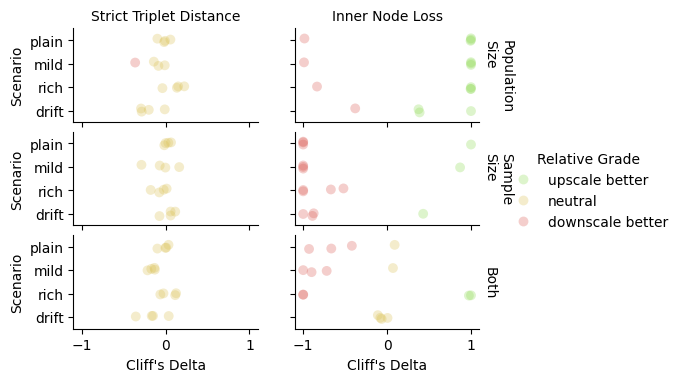

In [37]:
tp.tee(
    sns.catplot,
    dfm.rename(
        {
            "variable_x": "Metric",
            "value_y": "Cliff's Delta",
            "value_x": "Relative Grade",
        },
        axis=1,
    ),
    x="Cliff's Delta",
    # y="Policy",
    row="Scaling Factor",
    # row_order=["Tilted", "Steady"],
    hue="Relative Grade",
    hue_order=[
        "upscale better",
        "neutral",
        "downscale better",
    ],
    order=[
        "plain",
        "mild",
        "rich",
        "drift",
    ],
    col="Metric",
    # row="Scenario",
    y="Scenario",
    margin_titles=True,
    aspect=2,
    height=1.3,
    palette=sns.color_palette("hls", 8)[:3][::-1],
    alpha=0.3,
    s=50,
    kind="strip",
    teeplot_postprocess="teed.set_titles(col_template='{col_name}', row_template='{row_name}'); teed.tight_layout();",
    facet_kws=dict(
        gridspec_kws={"hspace":0.1},
    ),
    teeplot_outexclude=["post", "teeplot_postprocess"],
    teeplot_outattrs={
        "policy": "tilted",
    },
)
plt.show()


## Draw Stat Table --- hybrid


In [38]:
vars = [
    "Scaling Factor",
    "Scenario",
    "Unit",
    # "Num Generations",
    "Size<br/>(bits)",
]
styled_dfs = (
    dfr[
        (dfr["Num Generations"] == 100000)
        & (dfr["Algorithm"].isin(["surf-hybrid"]))
    ]
    .set_index(vars)
    .unstack(level=0)[
        [
            "Strict<br/>Triplet<br/>Distance",
            # "Lax<br/>Triplet<br/>Distance",
            "Inner<br/>Node<br/>Loss",
        ]
    ]
    .swaplevel(axis="columns")
    .sort_index(axis=1, level=0, ascending=False)
    .style.background_gradient(cmap=cmap, vmin=-1, vmax=1, axis=None)
    .format(lambda x: lookup_effect.get(x, "n/a"))
)

props = [
    ("cellpadding", "0px"),
    ("cellspacing", "0px"),
    ("border", "1px solid black"),
    ("border-collapse", "collapse"),
    ("max-width", "80px !important"),
    ("word-wrap", "break-word"),
]
moreprops = [
    *props,
    ("padding-top", "0px"),
    ("padding-bottom", "0px"),
    ("margin", "0px"),
    ("height", "0px"),
]
smallprops = [
    *moreprops,
    ("font-size", "9px"),
    ("text-align", "center"),
    ("width", "65px"),
]
bigprops = [
    *moreprops,
    ("font-size", "11px"),
    ("color", "white"),
    ("background-color", "DimGray"),
]

divider_style = [
    # Header cell borders
    {"selector": "th", "props": bigprops},
    # Data cell borders
    {"selector": "td", "props": smallprops},
    # Row borders
    {"selector": "tr", "props": smallprops},
]
styled_dfs = styled_dfs.set_table_styles(divider_style).set_table_attributes(
    'style="cellspacing:0;border-collapse:collapse;font-family:sans-serif;"'
)

styled_dfs


In [39]:
os.makedirs("outplots", exist_ok=True)
styler_to_pdf(styled_dfs, "outplots/dsamp-popsize-scale-hybrid.pdf")


inkscape output:
 
** (inkscape:6457): WARNING **: 04:17:50.006: No pages selected, getting first page only.

** (inkscape:6457): WARNING **: 04:17:50.174: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.



## Draw Summary Hybrid


In [40]:
dfp = dfr[
    (dfr["Num Generations"] == 100000)
    & (dfr["Algorithm"].isin(["surf-hybrid"]))
]


In [41]:
dfp = dfp.rename(
    columns={
        "Inner<br/>Node<br/>Loss": "Inner Node Loss Numerical",
        "Strict<br/>Triplet<br/>Distance": "Strict Triplet Distance Numerical",
    },
)
dfp["Inner Node Loss Numerical"] = dfp["Inner Node Loss Numerical"]* -1
dfp["Strict Triplet Distance Numerical"] = dfp["Strict Triplet Distance Numerical"] * -1


In [42]:
dfp["Strict Triplet Distance"] = dfp["Strict Triplet Distance Numerical"].apply(
    lambda x: {
        -1: "downscale better",
        0: "neutral",
        1: "upscale better",
    }[
        ("*" in lookup_effect.get(-x))
        * np.sign(x)
    ],
)
dfp["Inner Node Loss"] = dfp["Inner Node Loss Numerical"].apply(
    lambda x: {
        -1: "downscale better",
        0: "neutral",
        1: "upscale better",
    }[
        ("*" in lookup_effect.get(-x))
        * np.sign(x)
    ],
)


In [43]:
id_vars = [
    "Policy",
    "Scenario",
    "Unit",
    "Scaling Factor",
    # "Num Generations",
    "Size<br/>(bits)",
]
dfm = pd.DataFrame.merge(
    dfp.melt(
        id_vars=id_vars,
        value_vars=[
            "Strict Triplet Distance",
            "Inner Node Loss",
        ],
    ),
    dfp.melt(
        id_vars=id_vars,
        value_vars=[
            "Strict Triplet Distance Numerical",
            "Inner Node Loss Numerical",
        ],
    ),
    on=id_vars,
)


In [44]:
dfm = dfm[
    (
        dfm["variable_x"].isin(["Strict Triplet Distance"])
        & dfm["variable_y"].isin(["Strict Triplet Distance Numerical"])
    )
    | (
        dfm["variable_x"].isin(["Inner Node Loss"])
        & dfm["variable_y"].isin(["Inner Node Loss Numerical"])
    )
].reset_index()


In [45]:
dfm["Scenario"] = dfm["Scenario"].apply(lambda x: x.split("\n")[0])


In [46]:
dfm["Scaling Factor"].replace(
    {"Both Population and Sample Size": "Both"},
    inplace=True,
)
dfm["Scaling Factor"] = dfm["Scaling Factor"].apply(lambda x: x.replace(" ", "\n"))


/home/runner/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/home/runner/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/col=metric+hue=relative-grade+kind=strip+policy=hybrid+row=scaling-factor+viz=catplot+x=cliff-s-delta+y=scenario+ext=.pdf


teeplots/col=metric+hue=relative-grade+kind=strip+policy=hybrid+row=scaling-factor+viz=catplot+x=cliff-s-delta+y=scenario+ext=.png


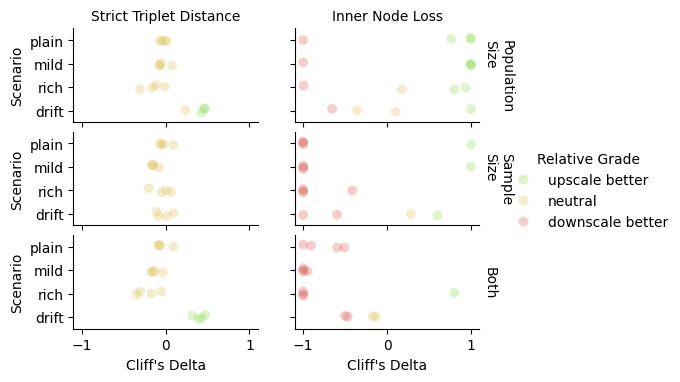

In [47]:
tp.tee(
    sns.catplot,
    dfm.rename(
        {
            "variable_x": "Metric",
            "value_y": "Cliff's Delta",
            "value_x": "Relative Grade",
        },
        axis=1,
    ),
    x="Cliff's Delta",
    # y="Policy",
    row="Scaling Factor",
    # row_order=["Tilted", "Steady"],
    hue="Relative Grade",
    hue_order=[
        "upscale better",
        "neutral",
        "downscale better",
    ],
    order=[
        "plain",
        "mild",
        "rich",
        "drift",
    ],
    col="Metric",
    # row="Scenario",
    y="Scenario",
    margin_titles=True,
    aspect=2,
    height=1.3,
    palette=sns.color_palette("hls", 8)[:3][::-1],
    alpha=0.3,
    s=50,
    kind="strip",
    teeplot_postprocess="teed.set_titles(col_template='{col_name}', row_template='{row_name}'); teed.tight_layout();",
    facet_kws=dict(
        gridspec_kws={"hspace":0.1},
    ),
    teeplot_outexclude=["post", "teeplot_postprocess"],
    teeplot_outattrs={
        "policy": "hybrid",
    },
)
plt.show()


## Reproducibility


In [48]:
datetime.datetime.now().isoformat()


'2024-10-02T04:17:52.373515'

In [49]:
%load_ext watermark
%watermark


Last updated: 2024-10-02T04:17:52.386285+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1014-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [50]:
!pip freeze


alifedata-phyloinformatics-convert==0.16.2
annotated-types==0.6.0
anytree==2.12.1
appdirs==1.4.4
argcomplete==3.5.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asttokens==2.4.1
attrs==23.2.0
Automat==20.2.0
Babel==2.8.0
backstrip==0.2.4
bcrypt==3.2.0
beautifulsoup4==4.12.3
biopython==1.83
bitarray==2.9.2
bitstring==4.1.4
black==22.10.0
bleach==6.1.0
blinker==1.4
Brotli==1.1.0
CacheControl==0.12.10
certifi==2024.2.2
cffi==1.16.0
chardet==4.0.0
charset-normalizer==3.3.2
click==8.1.7
cliffs-delta==1.0.0
cloud-init==24.2
colorama==0.4.4
colorclade==0.2.0
comm==0.2.1
command-not-found==0.3
configobj==5.0.6
constantly==15.1.0
contourpy==1.2.0
cryptography==3.4.8
cssselect==1.1.0
cssselect2==0.7.0
cycler==0.12.1
dataclasses==0.6
dbus-python==1.2.18
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
DendroPy==4.6.1
Deprecated==1.2.14
distro==1.7.0
distro-info==1.1+ubuntu0.2
distutils-strtobool==0.1.0
entrypoints==0.4
ete3==3.1.3
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.1

In [51]:
!inkscape --version


Inkscape 1.3.2 (1:1.3.2+202311252150+091e20ef0f)
